In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [14]:
def inter(x,a,b):
    if a<=x<=b:
        return True
def Y(X):
    y = []
    for i in range(X.shape[0]):
        if (inter(X[i][0],-1,-.5) or inter(X[i][0],0,.5)) and (inter(X[i][1],-1,-.5) or inter(X[i][1],0,.5)):
            y.append(1)
        elif  (inter(X[i][0],-.5,0) or inter(X[i][0],.5,1)) and (inter(X[i][1],-.5,0) or inter(X[i][1],.5,1)):
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)    

In [15]:
def echan(N:int):
    X = np.random.uniform(-1,1, (N,2))
    y = Y(X)
    return X,y

In [16]:
N = 5
echan(N)

(array([[-0.27217968, -0.51109047],
        [ 0.37997948, -0.64578529],
        [-0.66032929, -0.80154617],
        [ 0.02469615, -0.06722156],
        [-0.61195926, -0.87726759]]),
 array([-1,  1,  1, -1,  1]))

In [17]:
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

In [18]:
def phi(X, deg:int):
    phi_x = []
    for i in range(1,deg+1):
        for j in range(1,deg+1):
            if i+j <=  deg:
                phi_x.append(X[0]**i * X[1]**j)
    return phi_x

In [19]:
def phi_2(x, d):
    
    phi_x = np.array([1])
    
    
    for i in range(d+1):
        for j in range(d+1):
            
            if i + j > d:
                continue
            
            phi_x = np.append(phi_x, x[0]**i * x[1]**j)
            
    return phi_x


In [20]:
def fit_transform(X,y,deg:int):
    X_transform  = np.array([phi_2(_,deg) for _ in X])
    return X_transform, y

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
deg = 3
model = SVC(C= 10, kernel = "linear")
X,y = fit_transform(X_train,y_train,deg)
model.fit(X,y)
y_pred = model.predict(X)
# model.score(X,y)
hinge_loss(y,y_pred)

0.8533333333333334

In [22]:
def plot_data(X_train,y_train, X_test,y_test):
    fig, ax = plt.subplots(figsize = (8,8))
    for i, label in enumerate(y_train):
        if label == 1:
            ax.scatter(X_train[i][0],X_train[i][1], c = 'b', marker = 'o')
        else :
            ax.scatter(X_train[i][0],X_train[i][1], c= 'b', marker = 'x')
    
    for i,label in enumerate(y_test):
        if label == 1:
            ax.scatter(X_test[i][0],X_test[i][1], c = 'r', marker = 'o')
        else :
            ax.scatter(X_test[i][0],X_test[i][1], c= 'b', marker = 'x')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    plt.show()   

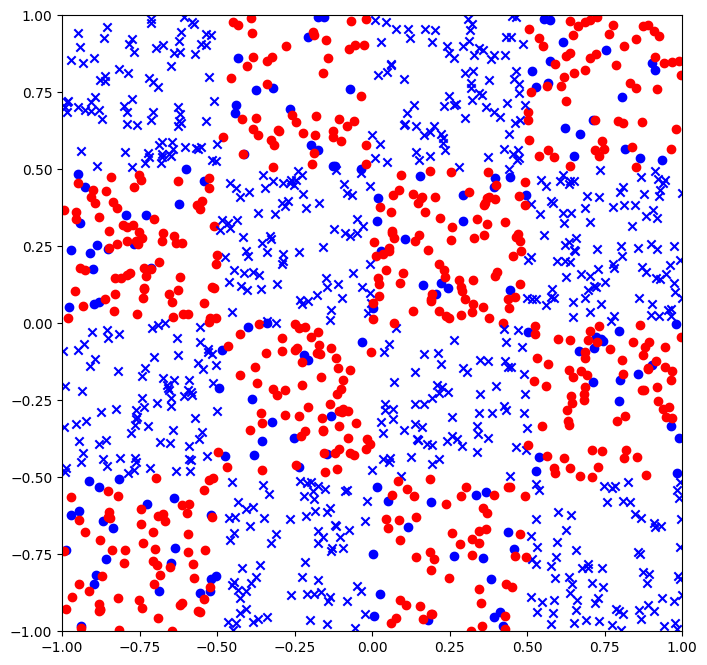

In [23]:
plot_data(X_train,y_train,X_test,y_test)

In [24]:
def loss(X,y,model):
    loss = []
    for x,label in zip(X,y):
        # Modify this line to pass x as a 2D array
        prediction = model.predict([x])[0]
        loss.append(max(0,1-label*prediction))
    return np.array(loss)
    
def plot_loss(deg,c,kernel):
    clf = SVC(C=c, kernel = kernel)
    X,y = fit_transform(X_train,y_train,deg)
    clf.fit(X,y)
    loss_train = loss(X,y,clf)
    # print(loss_train)
    print(f"Erreur empirique  en apprentissage pour c = {c} et deg = {deg}: ",loss_train.sum()/loss_train.shape[0])
    X2,y2 = fit_transform(X_test,y_test,deg)
    loss_test = loss(X2,y2,clf)
    print(f"Erreur empirique en test pour c = {c} et deg = {deg}: ", loss_test.sum()/loss_test.shape[0])
    fig,ax = plt.subplots(figsize = (4,4))
    ax.plot(loss_train, label = "erreur apprentissage", c = 'b')
    ax.plot(loss_test, label = "erreur en test", c = 'r')
    ax.set_xlim([0,20])
    ax.set_ylim([0,5])
    plt.legend(loc = 'best')
    plt.show()
    


Erreur empirique  en apprentissage pour c = 0.1 et deg = 3:  0.8133333333333334
Erreur empirique en test pour c = 0.1 et deg = 3:  0.938


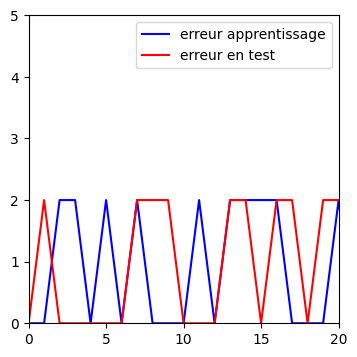

Erreur empirique  en apprentissage pour c = 1 et deg = 3:  0.8533333333333334
Erreur empirique en test pour c = 1 et deg = 3:  1.022


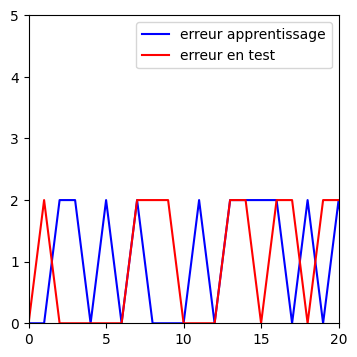

Erreur empirique  en apprentissage pour c = 5 et deg = 3:  0.8533333333333334
Erreur empirique en test pour c = 5 et deg = 3:  0.994


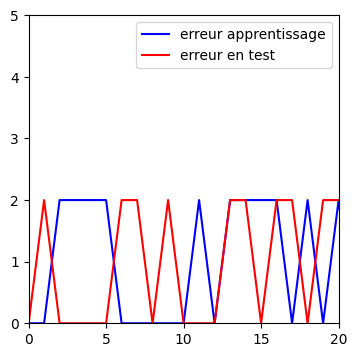

Erreur empirique  en apprentissage pour c = 10 et deg = 3:  0.8533333333333334
Erreur empirique en test pour c = 10 et deg = 3:  0.992


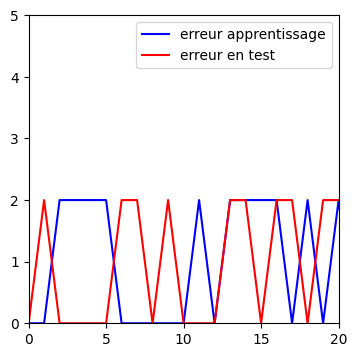

Erreur empirique  en apprentissage pour c = 30 et deg = 3:  0.8533333333333334
Erreur empirique en test pour c = 30 et deg = 3:  0.982


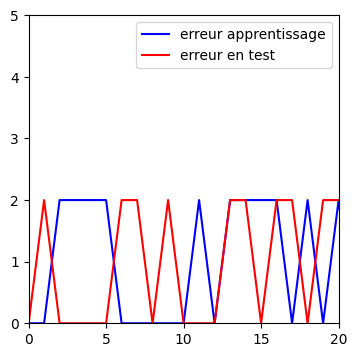

Erreur empirique  en apprentissage pour c = 100 et deg = 3:  0.8533333333333334
Erreur empirique en test pour c = 100 et deg = 3:  0.984


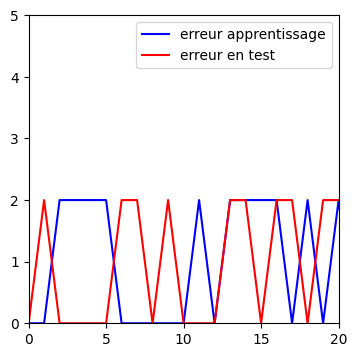

In [25]:
C = [.1,1,5,10,30,100]
deg = 3
for c in C:
    plot_loss(deg,c, "linear")

In [26]:
#6
dpoly = range(1,9)
C = 10
model = SVC(C= 10, kernel = "linear")
for deg in dpoly:
    X,y = fit_transform(X_train,y_train,deg)
    X2,y2 = fit_transform(X_test,y_test,deg)
    model.fit(X,y)
    y_pred_train = model.predict(X)
    y_pred_test = model.predict(X2)
    print(f"erreur empirique  en entrainement pour deg = {deg} :  {hinge_loss(y,y_pred_train)}")
    print(f"score en prediction pour deg = {deg} : {hinge_loss(y2,y_pred_test)}")
    print("\n===================================================================")
# hinge_loss(y,y_pred)

erreur empirique  en entrainement pour deg = 1 :  0.9533333333333334
score en prediction pour deg = 1 : 1.016

erreur empirique  en entrainement pour deg = 2 :  0.8666666666666667
score en prediction pour deg = 2 : 1.014

erreur empirique  en entrainement pour deg = 3 :  0.8533333333333334
score en prediction pour deg = 3 : 0.992

erreur empirique  en entrainement pour deg = 4 :  0.7466666666666667
score en prediction pour deg = 4 : 0.926

erreur empirique  en entrainement pour deg = 5 :  0.7066666666666667
score en prediction pour deg = 5 : 0.936

erreur empirique  en entrainement pour deg = 6 :  0.62
score en prediction pour deg = 6 : 0.772

erreur empirique  en entrainement pour deg = 7 :  0.6066666666666667
score en prediction pour deg = 7 : 0.76

erreur empirique  en entrainement pour deg = 8 :  0.5533333333333333
score en prediction pour deg = 8 : 0.698



In [27]:
#7
deg = 8
model = SVC(C = 10, kernel ="rbf")
X,y = fit_transform(X_train,y_train,deg)
X2,y2 = fit_transform(X_test,y_test,deg)
model.fit(X,y)
y_pred_train = model.predict(X)
y_pred_test = model.predict(X2)
print(f"erreur empirique  en entrainement pour deg = {deg} :  {hinge_loss(y,y_pred_train)}")
print(f"score en prediction pour deg = {deg} : {hinge_loss(y2,y_pred_test)}")


erreur empirique  en entrainement pour deg = 8 :  0.5066666666666667
score en prediction pour deg = 8 : 0.66


Erreur empirique  en apprentissage pour c = 10 et deg = 8:  0.5066666666666667
Erreur empirique en test pour c = 10 et deg = 8:  0.66


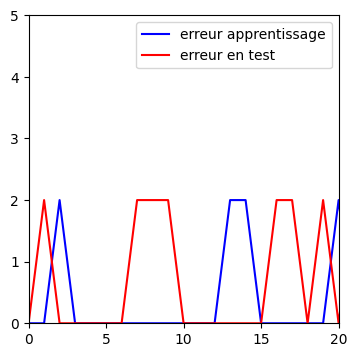

In [28]:
plot_loss(deg = 8,c= 10, kernel="rbf")
    


In [41]:
C = [.1,1,5.10,30,100]
gamma = [.1,.5,1,2,10]
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

Mat_Err_emp_test = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(C=C[i],kernel = "rbf", gamma=gamma[j])
        # X,y = fit_transform(X_train,y_train,deg)
        # X2,y2 = fit_transform(X_test,y_test,deg)
        model.fit(X_train,y_train)
        y_pred_test = model.predict(X_test)
        Mat_Err_emp_test[i,j] = hinge_loss(y_test,y_pred_test)


Min_loss_test = np.min(Mat_Err_emp_test)

row_indice_2, col_indice_2 = np.where(Mat_Err_emp_test == Min_loss_test)

indice_2 = (row_indice_2[0], col_indice_2[0]) 

print(f"\nles valeurs de C et gamma pour une erreur en test minimale  sont C = {C[indice_2[0]]} et gamma ={gamma[indice_2[1]]}") 
print(f"Erreur correspondant : {Mat_Err_emp_test[indice_2[0],indice_2[1]]}") 


les valeurs de C et gamma pour une erreur en test minimale  sont C = 100 et gamma =10
Erreur correspondant : 0.156


In [40]:
#noyau polynomiale
C = [.1,1,5.10,30,100]
gamma = [.1,.5,1,2,10]
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

Mat_Err_emp_test = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(C=C[i],kernel = "poly", gamma=gamma[j])
        # X,y = fit_transform(X_train,y_train,deg)
        # X2,y2 = fit_transform(X_test,y_test,deg)
        model.fit(X_train,y_train)
        y_pred_test = model.predict(X_test)
        Mat_Err_emp_test[i,j] = hinge_loss(y_test,y_pred_test)


Min_loss_test = np.min(Mat_Err_emp_test)

row_indice_2, col_indice_2 = np.where(Mat_Err_emp_test == Min_loss_test)

indice_2 = (row_indice_2[0], col_indice_2[0]) 

print(f"\nles valeurs de C et gamma pour une erreur en test minimale  sont C = {C[indice_2[0]]} et gamma ={gamma[indice_2[1]]}")
print(f"Erreur correspondant : {Mat_Err_emp_test[indice_2[0],indice_2[1]]}") 


les valeurs de C et gamma pour une erreur en test minimale  sont C = 0.1 et gamma =10
Erreur correspondant : 0.972


Avec le noyau polynomiale on obtient le couple optimal ($C$,$\gamma$) = ($0.1$,$10$) avec une erreur empire de $R_{emp}$ = $0.972$.
Pour le noyau gaussien le couple ($C$,$\gamma$) optimal est $(100,10)$ avec $R_{emp}$ = $0.156$. Le noyau gaussien permet une meilleure prediction de la classe de $x$

Exercice 2

In [42]:
def sign(x1,x2):
    return np.sign(50*x1**2+.5*x2**2-1)
def echan2(n):
    y = np.zeros(n)
    X = np.random.uniform(-1,1, (n,2))
    for i in range(n):
        y[i] = sign(X[i,0],X[i,1])
    return X,y

In [43]:
nbApp = 150
nbTest = 500
X_train,y_train = echan2(nbApp)
X_test, y_test = echan2(nbTest)

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

C = [.1,1,5.10,30,100]
dpoly = range(1,8)
Mat_error = np.zeros((len(C),len(dpoly)))
for i in range(len(C)):
    for j in range(len(dpoly)):
        model2 = SVC(C=C[i], kernel="poly")
        X,y = fit_transform(X_train,y_train,dpoly[j])
        X2,y2 = fit_transform(X_test,y_test,dpoly[j])
        model2.fit(X,y)
        y_pred = model2.predict(X2)
        err_emp = hinge_loss(y_pred,y2)
        Mat_error[i,j] = err_emp

min_mat_error = np.min(Mat_error)
row,col = np.where(Mat_error == min_mat_error)
indices = (row[0],col[0])

print(f"\nles valeurs de C et dpoly affichant les meilleurs performances sont C = {C[indices[0]]} et dpoly = {dpoly[indices[1]]}")
print(f"Erreur correspondant: {Mat_error[indices[0],indices[1]]}")


les valeurs de C et dpoly affichant les meilleurs performances sont C = 100 et dpoly = 2
Erreur correspondant: 0.12


Bad pipe message: %s [b'\x84e\t*\xe0\xd8\x88\x07\xa21W$\x15He w~ 4\xaci\x1c\xc2\xd8\x9cn\x7f\x86p\xe5\x1cI\xecG\x89\xbae\xe2\xfe\x96\xa1\x86\xde\xd50\x03S\x84\x8bt\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x9d\n\x0c\xe0(m\xe9BXu\x83y\xb7\xc4\x90\xd4B\xcc\xbd\x81']
Bad pipe message: %s [b"e\xcbz\x0c\x1dJ\xae\r\xfc\xa3\tM\xd7>\xb7\x97\xdd\xf3\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t

In [46]:
nbApp = 150
nbTest = 500
X_train,y_train = echan2(nbApp)
X_test, y_test = echan2(nbTest)

C = [.1,1,5.10,30,100]
gamma = [.1,.5,1,2,10]

Mat_error = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        model2 = SVC(C=C[i], kernel="rbf", gamma = gamma[j])
        # X,y = fit_transform(X_train,y_train,dpoly[j])
        # X2,y2 = fit_transform(X_test,y_test,dpoly[j])
        model2.fit(X_train,y_train)
        y_pred = model2.predict(X_test)
        err_emp = hinge_loss(y_pred,y_test)
        Mat_error[i,j] = err_emp

min_mat_error = np.min(Mat_error)
row,col = np.where(Mat_error == min_mat_error)
indices = (row[0],col[0])

print(f"\nles valeurs de C et gamma affichant les meilleurs performances sont C = {C[indices[0]]} et gamma = {gamma[indices[1]]}")
print(f"Erreur correspondant: {Mat_error[indices[0],indices[1]]}")


les valeurs de C et gamma affichant les meilleurs performances sont C = 100 et gamma = 2
Erreur correspondant: 0.088


Le noyau gaussien reste le meilleur model pour la prediction de la classe de $x$ : ($C$,$\gamma$) = $(100,2)$ pour $R_{emp}$ = $0.088$.
Le noyau Polynomial avec la transformation non lineaire $\phi$ pour $y = sgn(50x_1^2+0.5x_2^2 - 1)$ donne une meilleur prediction que la prediction avec le noyau gaussien de l'exercice 1.
De maniere avec la classe  $y = sgn(50x_1^2+0.5x_2^2 - 1)$ les resultats obtenues sont meilleurs compares ac ceux de l'exercice 1.